<a href="https://colab.research.google.com/github/IManasa19/Predicting-Energy-consumption/blob/main/ENERGY_CONSUMPTION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import Required Libraries
First, ensure you have the required libraries installed.

In [1]:
# Import libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 2: Load the Dataset
Assuming the dataset is either on your local system or hosted on a platform like Kaggle, you'll first need to load it into a DataFrame.

In [2]:
# Load dataset (replace with the actual path or use the Kaggle input directory)
data = pd.read_csv('/content/Manasa_daily_dataset.csv')

# Display the first few rows of the dataset
data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


# Step 3: Data Exploration and Preprocessing
Check for missing values and data types, and handle them appropriately.

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with median (if applicable)
# data.fillna(data.median(), inplace=True)

# Check data types and convert if necessary (e.g., convert day to datetime)
data['day'] = pd.to_datetime(data['day'])

# Drop or adjust non-numeric features if necessary (e.g., LCLid could be a unique identifier)
data = data.drop(['LCLid'], axis=1)

# Display basic statistics to understand the data
print(data.describe())


LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64
                                 day  energy_median   energy_mean  \
count                        3510433   3.510403e+06  3.510403e+06   
mean   2013-03-27 21:09:43.463407360   1.587395e-01  2.117305e-01   
min              2011-11-23 00:00:00   0.000000e+00  0.000000e+00   
25%              2012-10-21 00:00:00   6.700000e-02  9.808333e-02   
50%              2013-03-30 00:00:00   1.145000e-01  1.632917e-01   
75%              2013-09-10 00:00:00   1.910000e-01  2.624583e-01   
max              2014-02-28 00:00:00   6.970500e+00  6.928250e+00   
std                              NaN   1.701865e-01  1.908460e-01   

         energy_max  energy_count    energy_std    energy_sum    energy_min  
count  3.510403e+06  3.510433e+06  3.499102e+06  3.510403e+06  3.510403e+06  
me

In [4]:
# List of columns to check for NaN values
columns_to_check = ['energy_median', 'energy_mean', 'energy_max', 'energy_std', 'energy_sum', 'energy_min']

# Drop rows where any of the specified columns have NaN values
data = data.dropna(subset=columns_to_check)

# Verify that NaN values are dropped
print(data.isnull().sum())


day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64


# Step 4: Data Visualization
Create visualizations to understand the data better.
## Correlation Heatmap

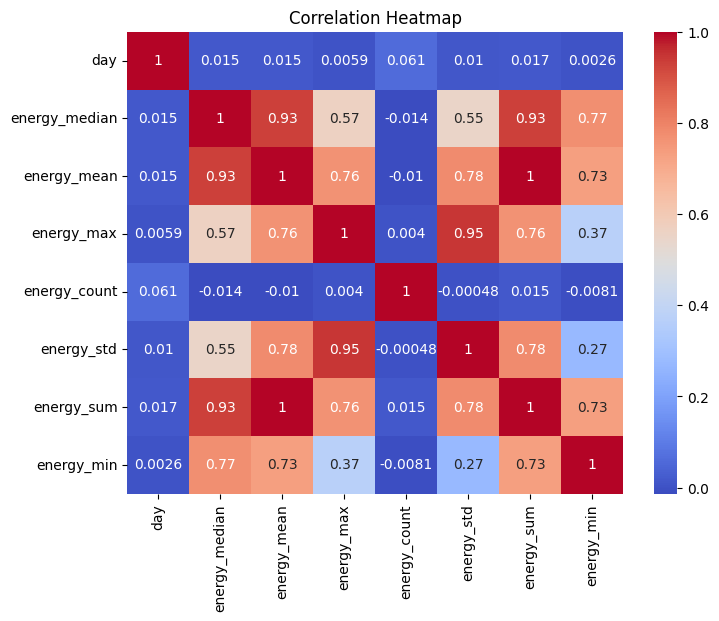

In [5]:
# Correlation matrix to understand relationships between energy metrics
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Energy Consumption Over Time

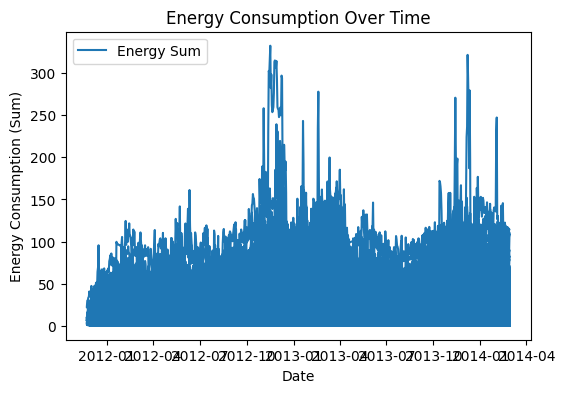

In [7]:
# Plot the energy sum over time
plt.figure(figsize=(6, 4))
plt.plot(data['day'], data['energy_sum'], label='Energy Sum')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Sum)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.show()


### Distribution of Energy Mean

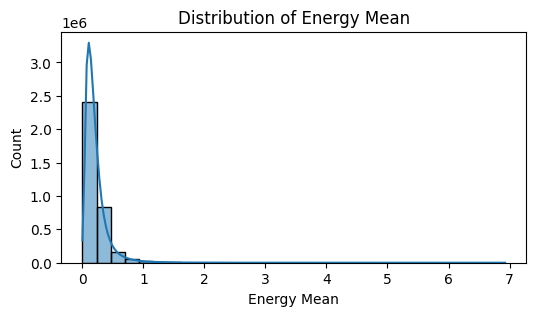

In [8]:
# Distribution plot for energy mean
plt.figure(figsize=(6, 3))
sns.histplot(data['energy_mean'], bins=30, kde=True)
plt.title('Distribution of Energy Mean')
plt.xlabel('Energy Mean')
plt.show()


# Step 5: Feature Engineering and Train-Test Split
Select features (independent variables) and target (dependent variable) and split the data into training and testing sets.

In [9]:
# Define features (X) and target (y)
X = data.drop(['energy_sum', 'day'], axis=1)  # Drop 'energy_sum' because it's the target, and 'day' because it's temporal
y = data['energy_sum']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but improves some models' performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Check for missing values
print(y.isnull().sum())

0


In [11]:
y.head()

,energy_sum
0,9.505
1,14.216
2,9.111
3,10.511
4,15.647


# Step 6: Train Machine Learning Models
Now, we train a Random Forest model to predict energy consumption.

In [ ]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
# Train Models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions)),
        "R^2": r2_score(y_test, predictions)
    }

# Step 7: Model Evaluation and Visualization
Actual vs Predicted Plot

In [ ]:
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


### Feature Importance Plot

In [ ]:
# # Plot feature importance from the Random Forest model
# importance = rf_model.feature_importances_
# features = X.columns

# plt.figure(figsize=(6, 3))
# sns.barplot(x=importance, y=features)
# plt.title('Feature Importance - Random Forest')
# plt.show()


NameError: name 'rf_model' is not defined

## Residuals Plot
A residual plot shows the difference between the actual and predicted values.

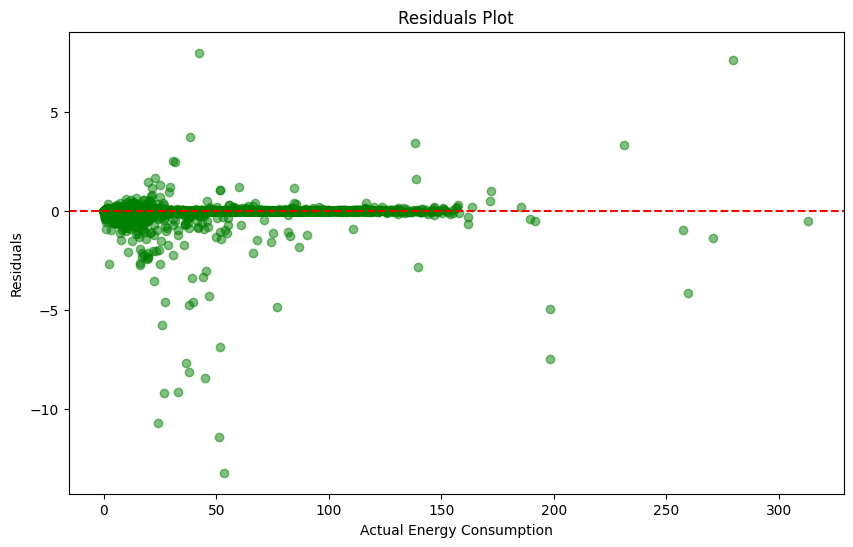

In [ ]:
# Residual plot (errors)
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [ ]:
X.head()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min
0,0.4850,0.432045,0.868,22,0.239146,0.072
1,0.1415,0.296167,1.116,48,0.281471,0.031
2,0.1015,0.189812,0.685,48,0.188405,0.064
3,0.1140,0.218979,0.676,48,0.202919,0.065
4,0.1910,0.325979,0.788,48,0.259205,0.066


In [ ]:
y.head()

,energy_sum
0,9.505
1,14.216
2,9.111
3,10.511
4,15.647


In [ ]:
new_input = pd.DataFrame({
    'energy_median': [0.4850],  # replace with actual value
    'energy_mean': [0.432045],    # replace with actual value
    'energy_max': [0.868],    # replace with actual value
    'energy_count': [22],   # replace with actual value
    'energy_std': [0.239146],     # replace with actual value
    # 'energy_sum': [1500],   # replace with actual value
    'energy_min': [0.072]      # replace with actual value
})

# Display the new input
print(new_input)

   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0          0.485     0.432045       0.868            22    0.239146   

   energy_min  
0       0.072  


In [ ]:
# Predict energy consumption using Random Forest
rf_prediction = rf_model.predict(new_input)
print(f'Predicted Energy Consumption (Random Forest): {rf_prediction[0]}')

Predicted Energy Consumption (Random Forest): 14.110839996246295


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Plot Model Performance
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(10, 6))
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.show()

In [ ]:
# Predicted vs Actual Plot
for name, model in models.items():
    predictions = model.predict(X_test)
    plt.scatter(y_test, predictions, label=name, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.legend()
plt.title("Prediction vs Actual Values")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()